# Plot 2 Lines together

## Year and total number of genre released

In [1]:
# Import required libraries
import matplotlib.pyplot as plt    # plt: Main plotting library for creating visualizations
                                  # - Contains functions for creating different types of plots
                                  # - Customizing plot appearance
                                  # - Managing figure windows

import pandas as pd               # pd: Data manipulation library
                                 # - Provides DataFrame and Series data structures
                                 # - Functions for reading/writing data
                                 # - Data analysis tools

# Read and prepare data
movie_data = pd.read_csv("movies_data.csv")    # pd.read_csv(): 
                                               # - Reads CSV file into DataFrame
                                               # - Creates table-like structure with rows and columns

# Convert year to datetime format
movie_data["Released_Year"] = pd.to_datetime(
    movie_data["Released_Year"],     # Column to convert
    errors="coerce",                 # Handle invalid dates by converting to NaT (Not a Time)
    format='%Y'                      # Specify input format is year only (YYYY)
)

In [2]:
movie_data["Genre"]    # Accessing the 'Genre' column from the DataFrame
                       # - Using square bracket notation to select a single column
                       # - Returns a pandas Series object containing all genre values

0       Drama
1       Crime
2      Action
3       Crime
4       Crime
        ...  
995    Comedy
996     Drama
997     Drama
998     Drama
999     Crime
Name: Genre, Length: 1000, dtype: object

# Group Genre by Year

In [3]:
# Group Genre by Year
genre_by_year = movie_data.groupby('Released_Year').size()    # Creates a summary of movie counts per year
                                                             # - groupby(): Groups data by release year
                                                             # - size(): Counts movies in each year group
                                                             # - Returns Series with:
                                                             #   * Index = Years
                                                             #   * Values = Number of movies that year

In [4]:
genre_by_year.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 99 entries, 1920-01-01 to 2020-01-01
Series name: None
Non-Null Count  Dtype
--------------  -----
99 non-null     int64
dtypes: int64(1)
memory usage: 1.5 KB


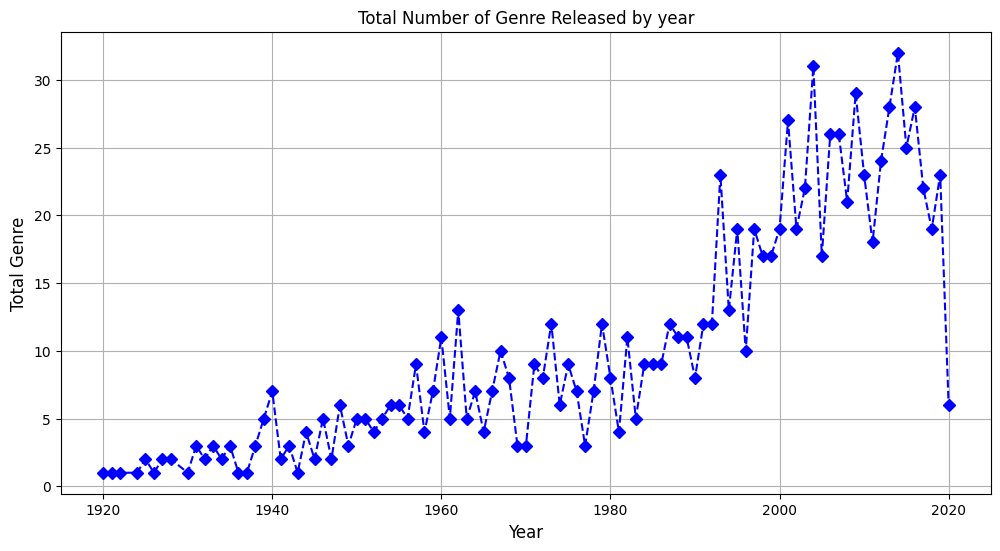

In [5]:
plt.figure(figsize=(12,6))                                              # Create new figure window
                                                                        # - Width = 12 inches
                                                                        # - Height = 6 inches

plt.plot(genre_by_year.index,                                          # X-axis: Years from index
        genre_by_year.values,                                          # Y-axis: Count of movies
        marker='D',                                                    # Use diamond markers for data points
        linestyle='--',                                               # Use dashed line style
        color = 'blue')                                               # Set line color to blue

plt.title('Total Number of Genre Released by year')                    # Add title to plot

plt.xlabel('Year', fontsize=12)                                        # Label x-axis
                                                                       # - Set font size to 12

plt.ylabel('Total Genre', fontsize=12)                                 # Label y-axis
                                                                       # - Set font size to 12

plt.grid()                                                            # Add grid lines to plot
plt.show()                                                            # Display the plot

# Group by Released year of Genre Action

In [6]:
# Group by Released year of Genre Action
Action_data = movie_data[movie_data['Genre'].str.contains('Action', case=False)]    # Filter movies containing 'Action' in Genre
                                                                                    # - str.contains(): Searches for substring
                                                                                    # - case=False: Makes search case-insensitive
                                                                                    # - Returns DataFrame with only Action movies

action_by_year = Action_data.groupby('Released_Year').size()                        # Count Action movies per year
                                                                                    # - groupby(): Groups by release year
                                                                                    # - size(): Counts movies in each year

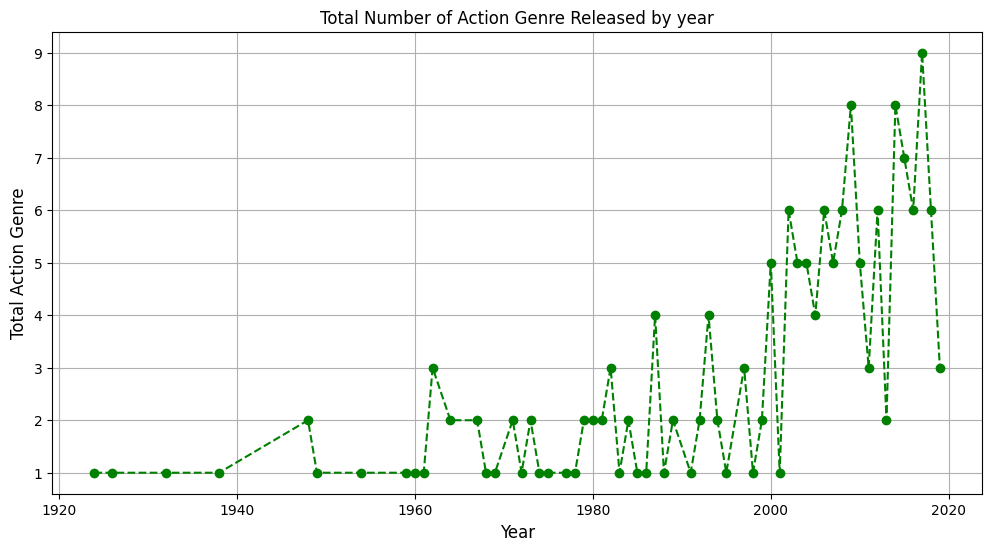

In [7]:
plt.figure(figsize=(12,6))                                                   # Create new figure window (12x6 inches)
plt.plot(action_by_year.index,                                              # X-axis: Years
        action_by_year.values,                                              # Y-axis: Count of Action movies
        marker='o',                                                         # Use circle markers
        linestyle='--',                                                     # Use dashed line
        color = 'green')                                                    # Set line color to green
plt.title('Total Number of Action Genre Released by year')                  # Add plot title
plt.xlabel('Year', fontsize=12)                                            # Label x-axis
plt.ylabel('Total Action Genre', fontsize=12)                              # Label y-axis
plt.grid()                                                                 # Add grid lines
plt.show()                                                                 # Display the plot

# Plot 2 lines

## Rating vs Runtime for the first 9 movies

In [8]:
# This line creates a smaller table (subset) from our main movie data
# We're only interested in the first 10 movies (using index 0 to 9)
# And we only want three pieces of information: movie title, rating, and how long the movie is
subset = movie_data.loc[0:9, ['Series_Title', 'IMDB_Rating', 'Runtime']]    # Creates a smaller dataset with just what we need
                                                                            # - loc[] is like using a highlighter to select specific parts
                                                                            # - 0:9 means "get me rows 0,1,2,3,4,5,6,7,8,9"
                                                                            # - The columns in [] are like choosing which columns we want to keep
                                                                            #   (like keeping just name, rating and length of movies)

# When we look at this data (subset), it shows us a neat table like this:
# - Movie names in first column
# - Their IMDB ratings in second column (out of 10)
# - How long each movie is (in minutes) in the last column

In [9]:
subset

,Series_Title,IMDB_Rating,Runtime
0,The Shawshank Redemption,9.3,142
1,The Godfather,9.2,175
2,The Dark Knight,9.0,152
3,The Godfather: Part II,9.0,202
4,12 Angry Men,9.0,96
5,The Lord of the Rings: The Return of the King,8.9,201
6,Pulp Fiction,8.9,154
7,Schindler's List,8.9,195
8,Inception,8.8,148
9,Fight Club,8.8,139


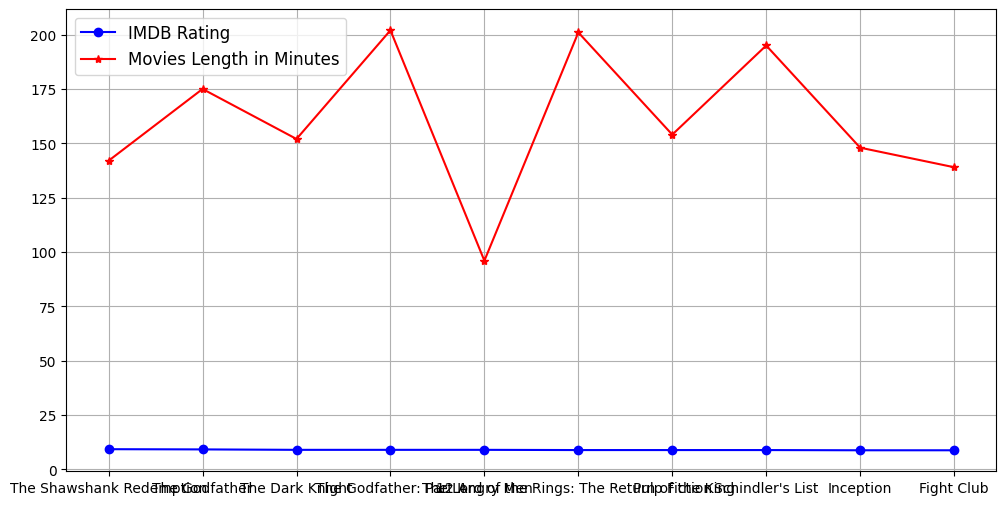

In [10]:
plt.figure(figsize=(12,6))                                                           # Make a new blank canvas
                                                                                     # - Size is 12 inches wide by 6 inches tall
                                                                                     # - Like choosing a good size paper to draw on

plt.plot(subset['Series_Title'], subset['IMDB_Rating'],                             # Draw the first line for IMDB ratings
         label='IMDB Rating',                                                        # - This line shows movie ratings
         color = 'blue',                                                            # - Make it blue so we can tell it apart
         marker='o')                                                                # - Add circle markers (o) at each data point

plt.plot(subset['Series_Title'], subset['Runtime'],                                 # Draw the second line for movie lengths
         label='Movies Length in Minutes',                                          # - This line shows how long each movie is
         color = 'red',                                                            # - Make it red to distinguish from ratings
         marker='*')                                                               # - Add star markers (*) at each data point

plt.grid()                                                                         # Add grid lines to make it easier to read
                                                                                   # - Like the lines in your graph paper

plt.legend(fontsize=12)                                                           # Add a legend (labels explaining each line)
                                                                                  # - Make the text size 12 so it's easy to read

plt.show()                                                                        # Actually display the plot on screen

/tmp/ipykernel_2363/3515851330.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(subset["Series_Title"],rotation=45)                  # Make movie titles rotate (45 degrees)


[Text(0, 0, 'The Shawshank Redemption'),
 Text(1, 0, 'The Godfather'),
 Text(2, 0, 'The Dark Knight'),
 Text(3, 0, 'The Godfather: Part II'),
 Text(4, 0, '12 Angry Men'),
 Text(5, 0, 'The Lord of the Rings: The Return of the King'),
 Text(6, 0, 'Pulp Fiction'),
 Text(7, 0, "Schindler's List"),
 Text(8, 0, 'Inception'),
 Text(9, 0, 'Fight Club')]

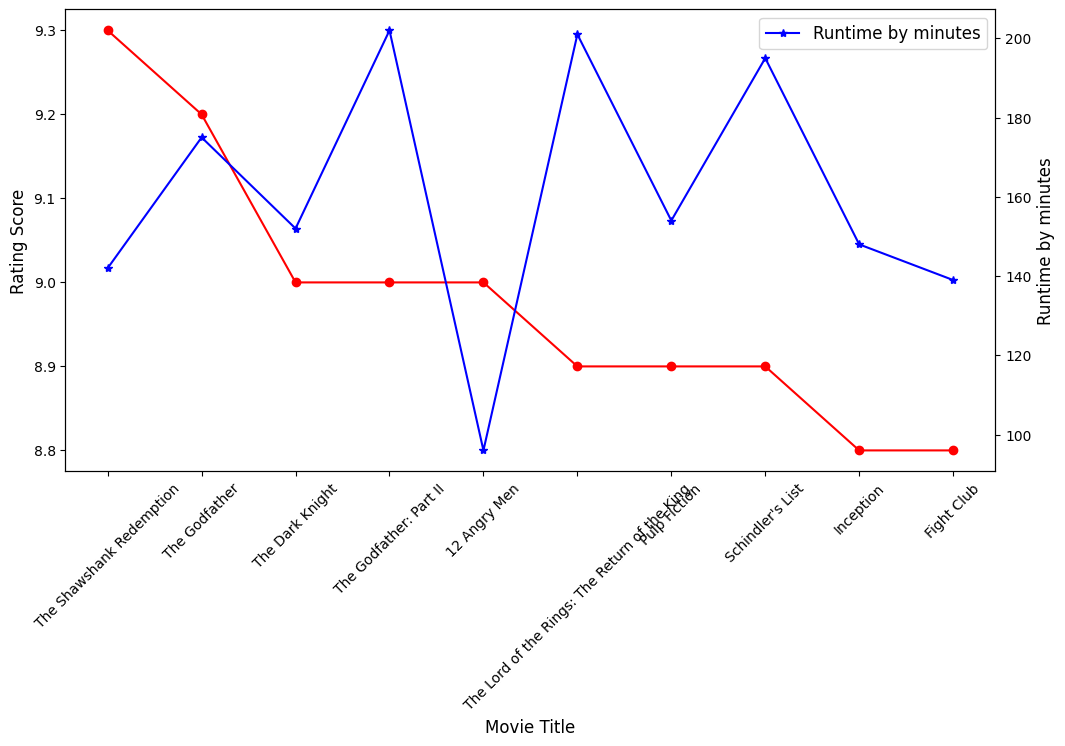

In [11]:
fig, ax1 = plt.subplots(figsize=(12,6))                                    # Create a special canvas with two different scales
                                                                           # - fig: the whole drawing area
                                                                           # - ax1: left side scale (for ratings)

ax1.set_xlabel("Movie Title", fontsize=12)                                 # Label for bottom of graph (movie names)
ax1.set_ylabel("Rating Score", fontsize=12)                                # Label for left side (ratings)

ax1.plot(subset['Series_Title'], subset['IMDB_Rating'],                    # Draw the ratings line
         marker = 'o',                                                     # - Add circles (o) at each rating point
         color='red',                                                      # - Make it red
         label = 'Rating')                                                 # - Label it as 'Rating' in legend

ax2 = ax1.twinx()                                                         # Create right side scale (like a twin of left side)
                                                                          # - This lets us show runtime with its own scale

ax2.set_ylabel("Runtime by minutes", fontsize=12)                         # Label for right side (movie length)
ax2.plot(subset['Series_Title'], subset['Runtime'],                       # Draw the runtime line
         marker = '*',                                                    # - Add stars (*) at each runtime point
         color = 'blue',                                                  # - Make it blue
         label='Runtime by minutes')                                      # - Label it as 'Runtime' in legend

plt.legend(fontsize=12)                                                   # Add the legend box

ax1.set_xticklabels(subset["Series_Title"],rotation=45)                  # Make movie titles rotate (45 degrees)
                                                                         # - Helps prevent text overlap

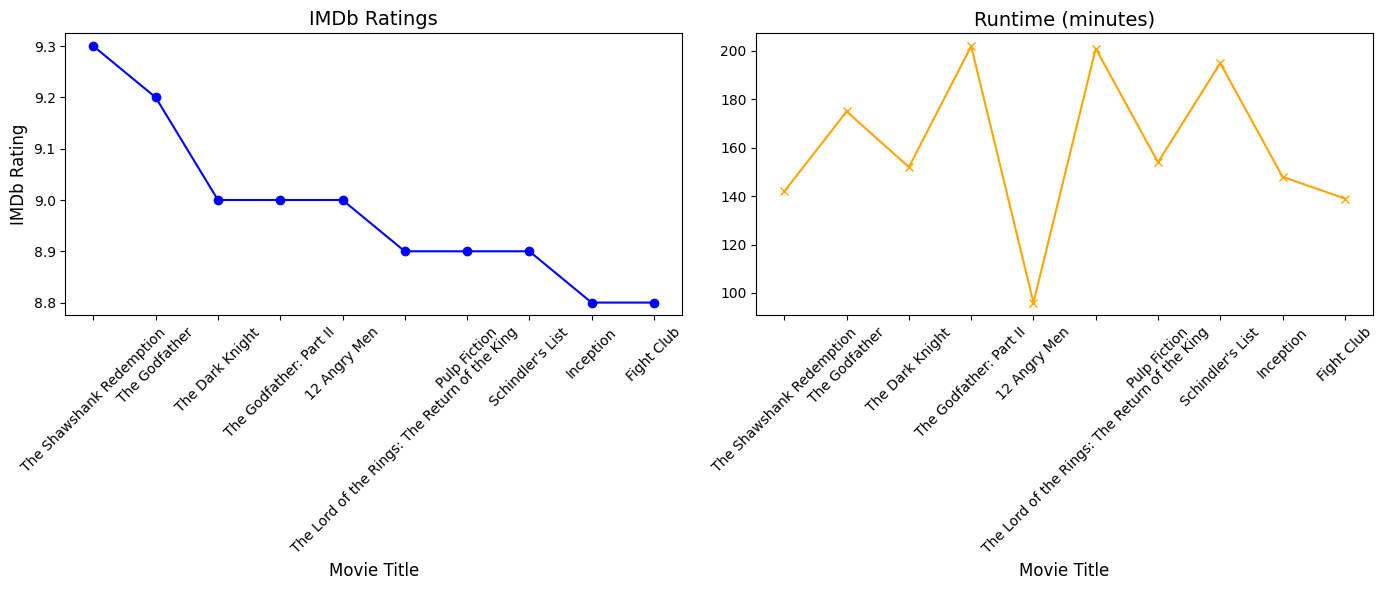

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

# Plot IMDb Ratings
axes[0].plot(subset['Series_Title'], subset['IMDB_Rating'], color='blue', marker='o')
axes[0].set_title('IMDb Ratings', fontsize=14)
axes[0].set_xlabel('Movie Title', fontsize=12)
axes[0].set_ylabel('IMDb Rating', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)

# Plot Runtime
axes[1].plot(subset['Series_Title'], subset['Runtime'], color='orange', marker='x')
axes[1].set_title('Runtime (minutes)', fontsize=14)
axes[1].set_xlabel('Movie Title', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Tight layout for spacing
plt.tight_layout()
plt.show()
